In [127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sb

In [2]:
database_connection = sqlite3.connect("C:/Users/Sumit/Downloads/database.sqlite/database.sqlite")

In [3]:
# Select all tables
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'; """, database_connection)
# Check if tables were read successfully
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
# Player Attributes Table
Player_Attributes = pd.read_sql_query("""SELECT * 
                                         FROM Player_Attributes
                                         """, database_connection)
# Players Table
Player = pd.read_sql("""SELECT *
                        FROM Player
                        """, database_connection)

# Matches Table
Match = pd.read_sql("""SELECT *
                       FROM Match
                       """, database_connection)

# Leagues Table
League = pd.read_sql("""SELECT *
                        FROM League
                        """, database_connection)

# Countries Table
Country = pd.read_sql("""SELECT *
                         FROM Country
                         """, database_connection)

# Team Table
Team = pd.read_sql("""SELECT *
                      FROM Team
                      """, database_connection)

# Team Attributes Table
Team_Attributes = pd.read_sql("""SELECT *
                                 FROM Team_Attributes
                                 """, database_connection)

#### LEFT JOIN Player Table with Player Attributes Table

In [67]:
# Read SQL: LEFT JOIN Player_Attributes and Player Tables 
player_atts = pd.read_sql("""SELECT player_name,
                                    birthday,
                                    date,
                                    overall_rating,
                                    height,
                                    attacking_work_rate,
                                    crossing,
                                    finishing,
                                    shot_power,
                                    heading_accuracy,
                                    sprint_speed,
                                    agility,
                                    dribbling,
                                    reactions,
                                    defensive_work_rate,
                                    preferred_foot,
                                    free_kick_accuracy,
                                    stamina,
                                    penalties       
                             FROM Player
                             LEFT JOIN Player_Attributes
                             ON Player_Attributes.player_api_id = Player.player_api_id 
                             WHERE date LIKE '2014%'
                             ORDER BY date
                             """, database_connection)
# Peak at the first 5 entries
player_atts.head(5)

,player_name,birthday,date,overall_rating,height,attacking_work_rate,crossing,finishing,shot_power,heading_accuracy,sprint_speed,agility,dribbling,reactions,defensive_work_rate,preferred_foot,free_kick_accuracy,stamina,penalties
0,Aaron Meijers,1987-10-28 00:00:00,2014-01-03 00:00:00,67.0,175.26,medium,65.0,41.0,66.0,58.0,75.0,69.0,69.0,69.0,medium,left,66.0,77.0,55.0
1,Achille Emana,1982-06-05 00:00:00,2014-01-03 00:00:00,73.0,180.34,medium,64.0,70.0,79.0,61.0,64.0,67.0,73.0,72.0,low,right,71.0,55.0,72.0
2,Adam Lallana,1988-05-10 00:00:00,2014-01-03 00:00:00,79.0,172.72,high,75.0,70.0,68.0,67.0,76.0,84.0,84.0,73.0,medium,right,66.0,80.0,61.0
3,Adam Morgan,1994-04-21 00:00:00,2014-01-03 00:00:00,63.0,177.80,medium,39.0,67.0,61.0,57.0,79.0,64.0,61.0,59.0,medium,left,42.0,59.0,66.0
4,Adama Traore,1990-02-03 00:00:00,2014-01-03 00:00:00,62.0,170.18,high,63.0,51.0,65.0,52.0,85.0,73.0,61.0,42.0,medium,left,33.0,70.0,52.0


## Cleaning Data

In [69]:
# Null Values Check
player_atts.isnull().sum()

player_name             0
birthday                0
date                    0
overall_rating         16
height                  0
attacking_work_rate    16
crossing               16
finishing              16
shot_power             16
heading_accuracy       16
sprint_speed           16
agility                16
dribbling              16
reactions              16
defensive_work_rate    16
preferred_foot         16
free_kick_accuracy     16
stamina                16
penalties              16
dtype: int64

In [71]:
# Dropping rows with null values
player_atts=player_atts.dropna()

In [72]:
player_atts.isnull().sum()

player_name            0
birthday               0
date                   0
overall_rating         0
height                 0
attacking_work_rate    0
crossing               0
finishing              0
shot_power             0
heading_accuracy       0
sprint_speed           0
agility                0
dribbling              0
reactions              0
defensive_work_rate    0
preferred_foot         0
free_kick_accuracy     0
stamina                0
penalties              0
dtype: int64

In [73]:
player_atts.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rating,32792.0,68.944255,6.472284,40.00,65.0,69.00,73.00,94.00
height,32792.0,181.766000,6.395239,160.02,177.8,182.88,185.42,208.28
crossing,32792.0,56.210783,15.859415,8.00,46.0,60.00,68.00,91.00
finishing,32792.0,50.930379,17.644249,6.00,35.0,54.00,65.00,97.00
shot_power,32792.0,63.159582,15.191739,12.00,56.0,67.00,74.00,96.00
heading_accuracy,32792.0,58.077153,14.728564,10.00,50.0,60.00,68.00,95.00
sprint_speed,32792.0,68.325842,12.916988,20.00,62.0,70.00,77.00,97.00
agility,32792.0,66.343986,13.543602,16.00,58.0,68.00,76.00,95.00
dribbling,32792.0,60.916077,15.961245,6.00,54.0,65.00,72.00,97.00
reactions,32792.0,66.464199,8.732055,20.00,61.0,67.00,72.00,96.00


In [74]:
#Finding Duplicate Data

dupli_df = player_atts.duplicated()
print("We have", dupli_df.sum(),"duplicates in this dataset.")

We have 0 duplicates in this dataset.


# Analysis

### Highest rated players of 2014 WC


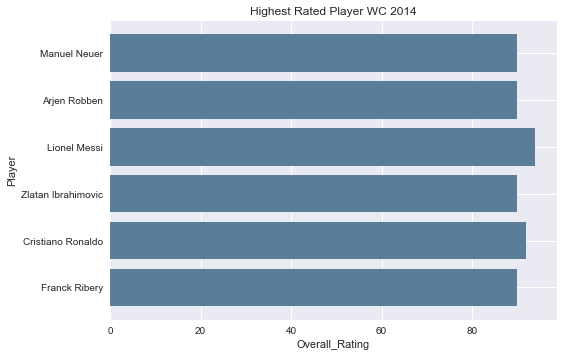

,player_name,overall_rating
748,Franck Ribery,90.0
1424,Cristiano Ronaldo,92.0
6732,Zlatan Ibrahimovic,90.0
13987,Lionel Messi,94.0
18565,Arjen Robben,90.0
21541,Lionel Messi,93.0
21781,Manuel Neuer,90.0


In [111]:
high_rate = player_atts[player_atts.overall_rating>=90]
high_rate = pd.DataFrame(high_rate[["player_name", "overall_rating"]]).drop_duplicates()

plt.barh(high_rate['player_name'] ,high_rate['overall_rating'],color = '#5a7d9a')


plt.xlabel('Overall_Rating')
plt.ylabel('Player')
plt.title('Highest Rated Player WC 2014')
plt.show()
high_rate

## Which Players Were the Fastest Sprinters in 2014 

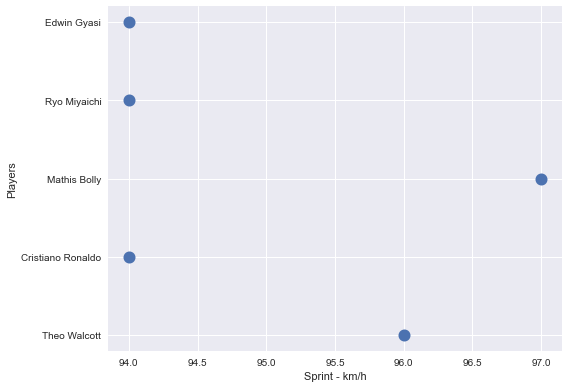

In [123]:


# Get 94+ Paced Players
high_pace = player_atts[player_atts.sprint_speed>=94]
high_pace = pd.DataFrame(high_pace[["player_name", "sprint_speed"]]).drop_duplicates()
high_pace.nlargest(5,'sprint_speed')

plt.scatter(high_pace['sprint_speed'].head(5),high_pace['player_name'].head(5),cmap = 'Blues',
            linewidth = 5 ,
           alpha = 1)
plt.xlabel('Sprint - km/h')
plt.ylabel('Players')
plt.tight_layout()
plt.show()

##  Which Players Were Prolific Penalty Takers in 2014

In [96]:


high_penalty = player_atts[player_atts.penalties>=90]
high_penalty = high_penalty[["player_name", "penalties"]]
high_penalty = pd.DataFrame(high_penalty)
high_penalty = high_penalty.drop_duplicates()
high_penalty = high_penalty.sort_values(by="penalties", ascending=False)
high_penalty.head(5)

,player_name,penalties
2527,Mario Balotelli,95.0
12715,Rickie Lambert,95.0
4863,Rickie Lambert,94.0
7247,Mario Balotelli,93.0
2222,David Villa,92.0


## How many Players were left-footed and Right-footed?

In [97]:
preferred_foot = pd.DataFrame(player_atts['preferred_foot'].value_counts())
preferred_foot

,preferred_foot
right,24763
left,8029


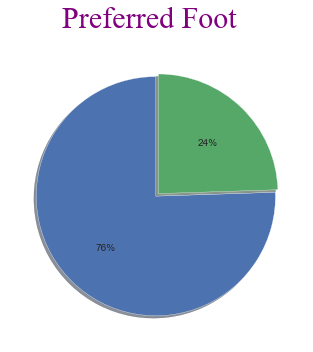

In [101]:
# Set figure size

plt.tight_layout()

#Set Plot Title 
plt.suptitle("Preferred Foot", fontname ='Times New Roman', size = 30, color ='purple')

# Pie Chart

explode = (0.01, 0.02)
pie = plt.pie(player_atts["preferred_foot"].value_counts(),
              autopct='%1.0f%%', 
              explode=explode, 
              startangle=90, 
              shadow=True, 
              wedgeprops={'edgecolor': 'white'})

plt.show()

## Top finishers of WC 2014

,player_name,finishing
389,Robin van Persie,91.0
420,Sergio Aguero,90.0
697,Edinson Cavani,90.0
780,Gonzalo Higuain,90.0
1424,Cristiano Ronaldo,92.0
4832,Radamel Falcao,93.0
5098,Zlatan Ibrahimovic,91.0
13987,Lionel Messi,97.0
19153,Cristiano Ronaldo,95.0
19516,Diego Costa,90.0


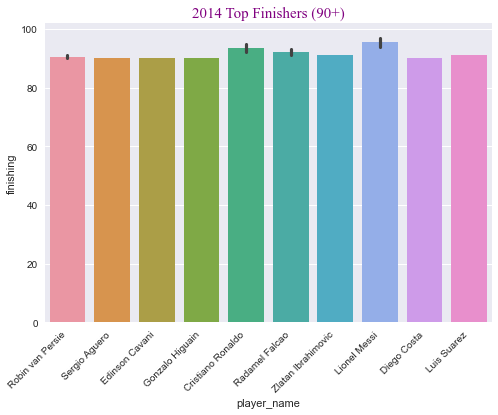

In [130]:

finishing = player_atts[player_atts.finishing>=90]
finishing = pd.DataFrame(finishing[["player_name", "finishing"]]).drop_duplicates()
## Plot

finishing_barplot = sb.barplot(data = finishing, x="player_name", y = "finishing")
finishing_barplot.set_xticklabels(finishing_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("2014 Top Finishers (90+)", fontname ='Times New Roman', size = 15, color ='purple')
finishing

# CR7 vs MESSI 

In [132]:
# Read Cristiano's Data from the database
cris = pd.read_sql("""SELECT player_name,
                                  date,overall_rating,
                                  attacking_work_rate,
                                  crossing,
                                  finishing,
                                  shot_power,
                                  heading_accuracy,
                                  free_kick_accuracy,
                                  sprint_speed,
                                  dribbling,
                                  agility
                                    
                      FROM Player 
                      LEFT JOIN Player_Attributes
                      ON Player.player_api_id = Player_Attributes.player_api_id
                    
                      WHERE player_name = 'Cristiano Ronaldo'
                        
                      ORDER by date
                      """, database_connection)

# Read Messi's Data from the database
messi = pd.read_sql("""SELECT player_name,
                                  date,overall_rating,
                                  attacking_work_rate,
                                  crossing,
                                  finishing,
                                  shot_power,
                                  heading_accuracy,
                                  free_kick_accuracy,
                                  sprint_speed,
                                  dribbling,
                                  agility
                                    
                      FROM Player 
                      LEFT JOIN Player_Attributes
                      ON Player.player_api_id = Player_Attributes.player_api_id
                    
                      WHERE player_name = 'Lionel Messi'
                        
                      ORDER by date
                      """, database_connection)
# Covert date column
cris["date"] = pd.to_datetime(cris["date"])
messi["date"] = pd.to_datetime(messi["date"])

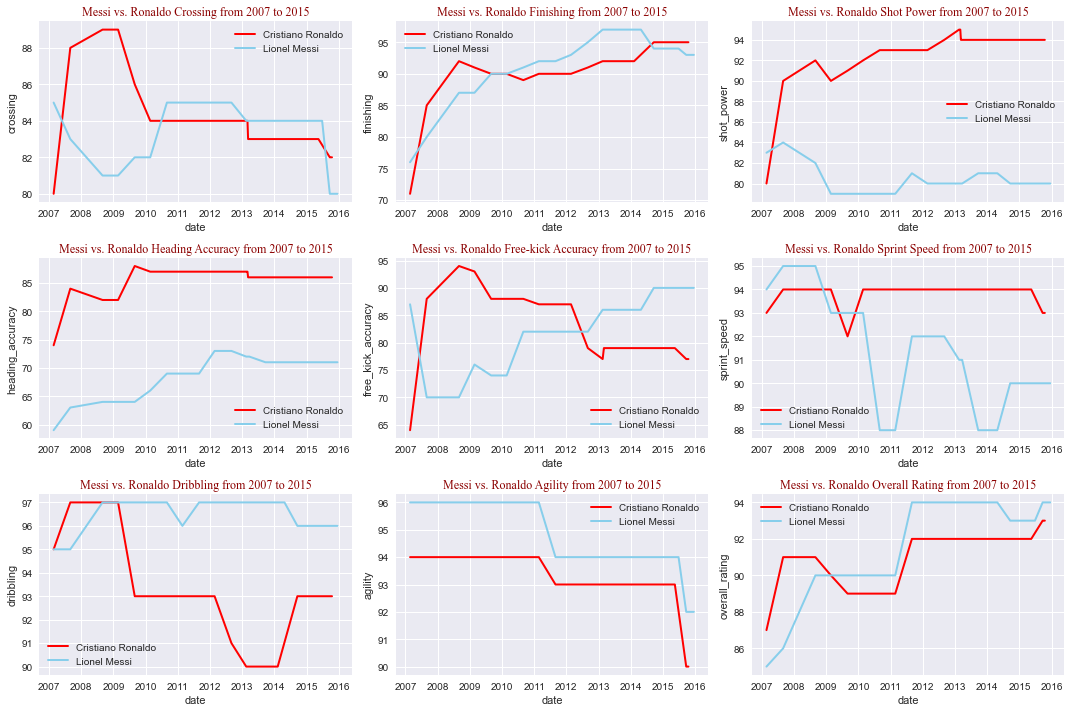

In [136]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sb.lineplot(x='date', y='crossing', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Crossing from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='crossing', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,2)
sb.lineplot(x='date', y='finishing', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Finishing from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='finishing', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,3)
sb.lineplot(x='date', y='shot_power', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Shot Power from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='shot_power', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')


plt.subplot(3,3,4)
sb.lineplot(x='date', y='heading_accuracy', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Heading Accuracy from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='heading_accuracy', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,5)
sb.lineplot(x='date', y='free_kick_accuracy', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Free-kick Accuracy from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='free_kick_accuracy', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,6)
sb.lineplot(x='date', y='sprint_speed', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Sprint Speed from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='sprint_speed', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,7)
sb.lineplot(x='date', y='dribbling', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Dribbling from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='dribbling', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,8)
sb.lineplot(x='date', y='agility', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Agility from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='agility', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.subplot(3,3,9)
sb.lineplot(x='date', y='overall_rating', data=cris, markerfacecolor="gold", markersize=12, color='red', linewidth=2, label='Cristiano Ronaldo').set_title("Messi vs. Ronaldo Overall Rating from 2007 to 2015", fontname ='Times New Roman', size = 12, color ='Darkred' )
sb.lineplot(x='date', y='overall_rating', data=messi, markerfacecolor="darkblue", markersize=12, color='skyblue', linewidth=2, label='Lionel Messi')

plt.tight_layout()